In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\weather_data.csv")
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S


In [3]:
df.shape

(161, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day',
       'Year', 'Temp', 'Weather'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  161 non-null    int64  
 1   Ozone       123 non-null    float64
 2   Solar.R     154 non-null    float64
 3   Wind        161 non-null    float64
 4   Temp C      161 non-null    object 
 5   Month       161 non-null    object 
 6   Day         161 non-null    int64  
 7   Year        161 non-null    int64  
 8   Temp        161 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.7+ KB


In [8]:
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,161.000000,123.000000,154.000000,161.000000,161.000000,161.0,161.000000
mean,80.391304,41.837398,185.642857,9.903106,15.950311,2025.0,77.739130
std,46.121738,32.674343,88.237623,3.503274,9.066285,0.0,9.397155
min,1.000000,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000
25%,41.000000,18.000000,121.750000,7.400000,8.000000,2025.0,72.000000
50%,80.000000,31.000000,195.500000,9.700000,16.000000,2025.0,78.000000
75%,120.000000,62.000000,257.500000,11.500000,24.000000,2025.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000


In [9]:
df.describe(include='object')

,Temp C,Month,Weather
count,161,161,158
unique,41,6,3
top,76,9,S
freq,11,35,59


In [10]:
df.duplicated().sum()

3

In [11]:
df.loc[df.duplicated()]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
84,70,97.0,272.0,5.7,92,7,9,2025,92,C
155,154,41.0,190.0,7.4,67,5,1,2025,67,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [12]:
df = df.drop_duplicates(ignore_index=True)

In [13]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2025,67,C
154,155,30.0,193.0,6.9,70,9,26,2025,70,PS
155,156,NaN,145.0,13.2,77,9,27,2025,77,S
156,157,14.0,191.0,14.3,75,9,28,2025,75,S


In [15]:
df = df.drop(["Unnamed: 0","Temp C"],axis=1)

In [16]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [17]:

df = df.rename({"Solar.R":"Solar"},axis=1)
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [18]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [19]:
mean = df["Solar"].mean().round()
mean


185.0

In [20]:
df["Solar"] = df["Solar"].fillna(mean)

In [22]:
df["Month"].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [23]:
df["Month"].replace({"May":'5'}).unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [24]:
df["Month"] = df["Month"].replace({"May":'5'})
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [25]:

df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

In [26]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,2025,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,2025,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,2025,75,S,2025-09-28


<Axes: >

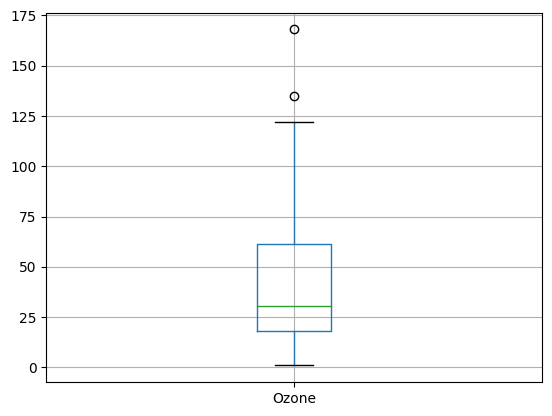

In [27]:
df.boxplot(column="Ozone")

In [28]:
df['Ozone'].describe()

count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [29]:
IQR = 61.500000 - 18.000000
max_limit = 61.500000 + 1.5 * IQR
max_limit


126.75

In [30]:

df[df["Ozone"]>max_limit]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
61,135.0,269.0,4.1,7,1,2025,84,S,2025-07-01
116,168.0,238.0,3.4,8,25,2025,81,PS,2025-08-25


In [31]:

df.dtypes

Ozone             float64
Solar             float64
Wind              float64
Month              object
Day                 int64
Year                int64
Temp                int64
Weather            object
Date       datetime64[ns]
dtype: object

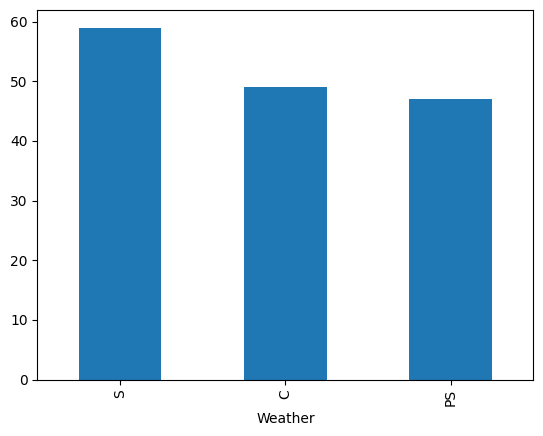

In [32]:
df["Weather"].value_counts().plot(kind='bar')
plt.show()

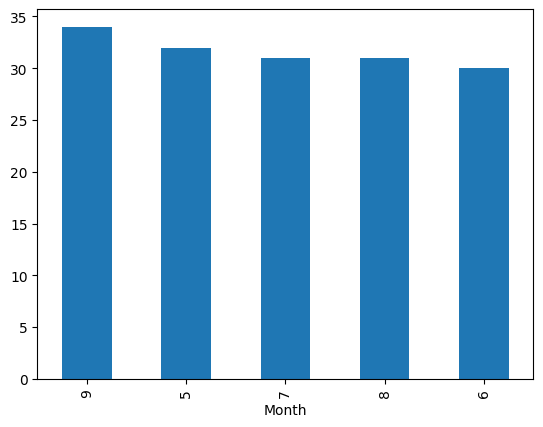

In [33]:
df["Month"].value_counts().plot(kind='bar')
plt.show()

In [34]:
df.var(numeric_only=True)

Ozone    1064.110644
Solar    7520.824518
Wind       12.328955
Day        80.949004
Year        0.000000
Temp       87.944570
dtype: float64

In [35]:

df.skew(numeric_only=True)

Ozone    1.282000
Solar   -0.425459
Wind     0.349332
Day     -0.036407
Year     0.000000
Temp    -0.340108
dtype: float64

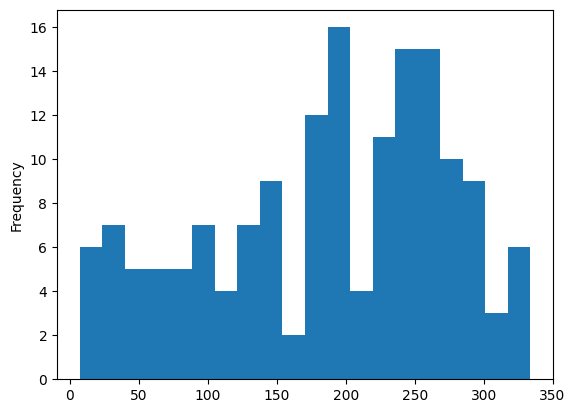

In [36]:
df["Solar"].plot(kind='hist', bins=20)
plt.show()

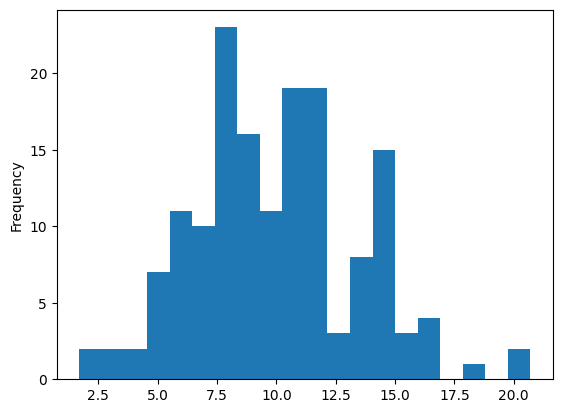

In [37]:
df["Wind"].plot(kind='hist', bins=20)
plt.show()


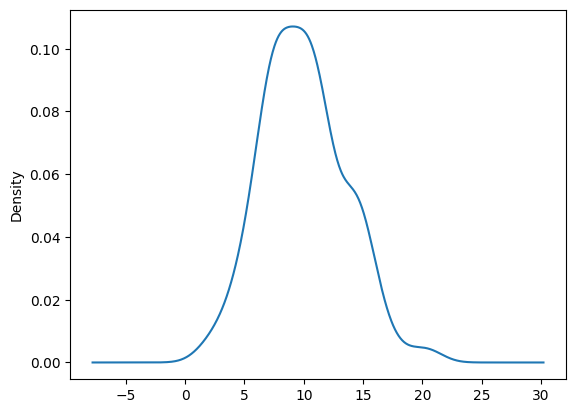

In [38]:
df["Wind"].plot(kind='kde')
plt.show()

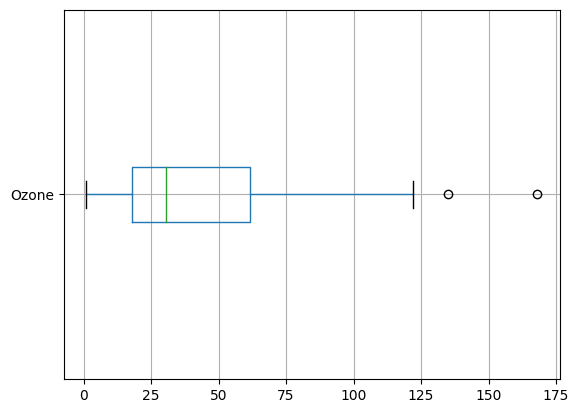

In [39]:
df.boxplot(column="Ozone", vert=False)
plt.show()

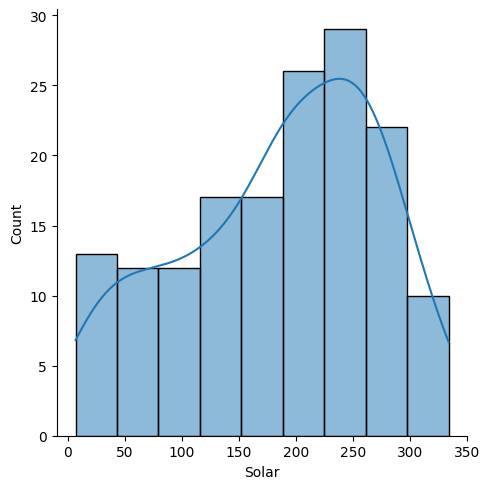

In [40]:
sns.displot(data=df, x='Solar', kind='hist', kde=True)
plt.show()

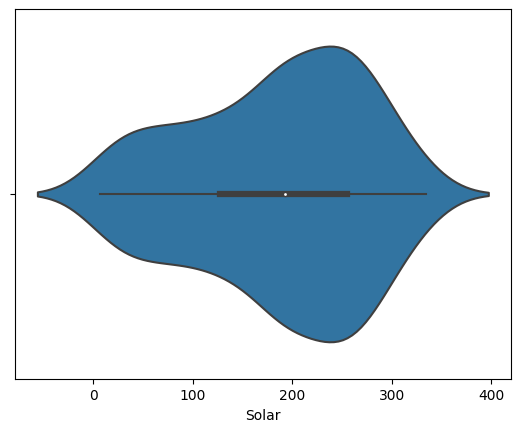

In [41]:
sns.violinplot(data=df, x="Solar")
plt.show()

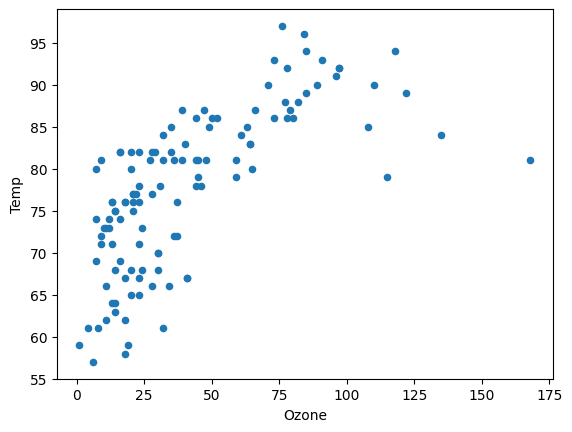

In [42]:
df.plot(kind="scatter", x="Ozone", y="Temp")
plt.show()

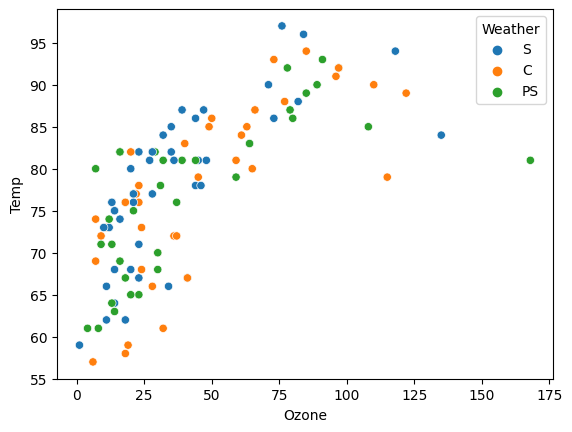

In [43]:
sns.scatterplot(data=df, x="Ozone", y="Temp", hue="Weather")
plt.show()

In [44]:
df1 = df.drop(["Year"], axis=1)
df1

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,56,S,2025-05-05
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,75,S,2025-09-28


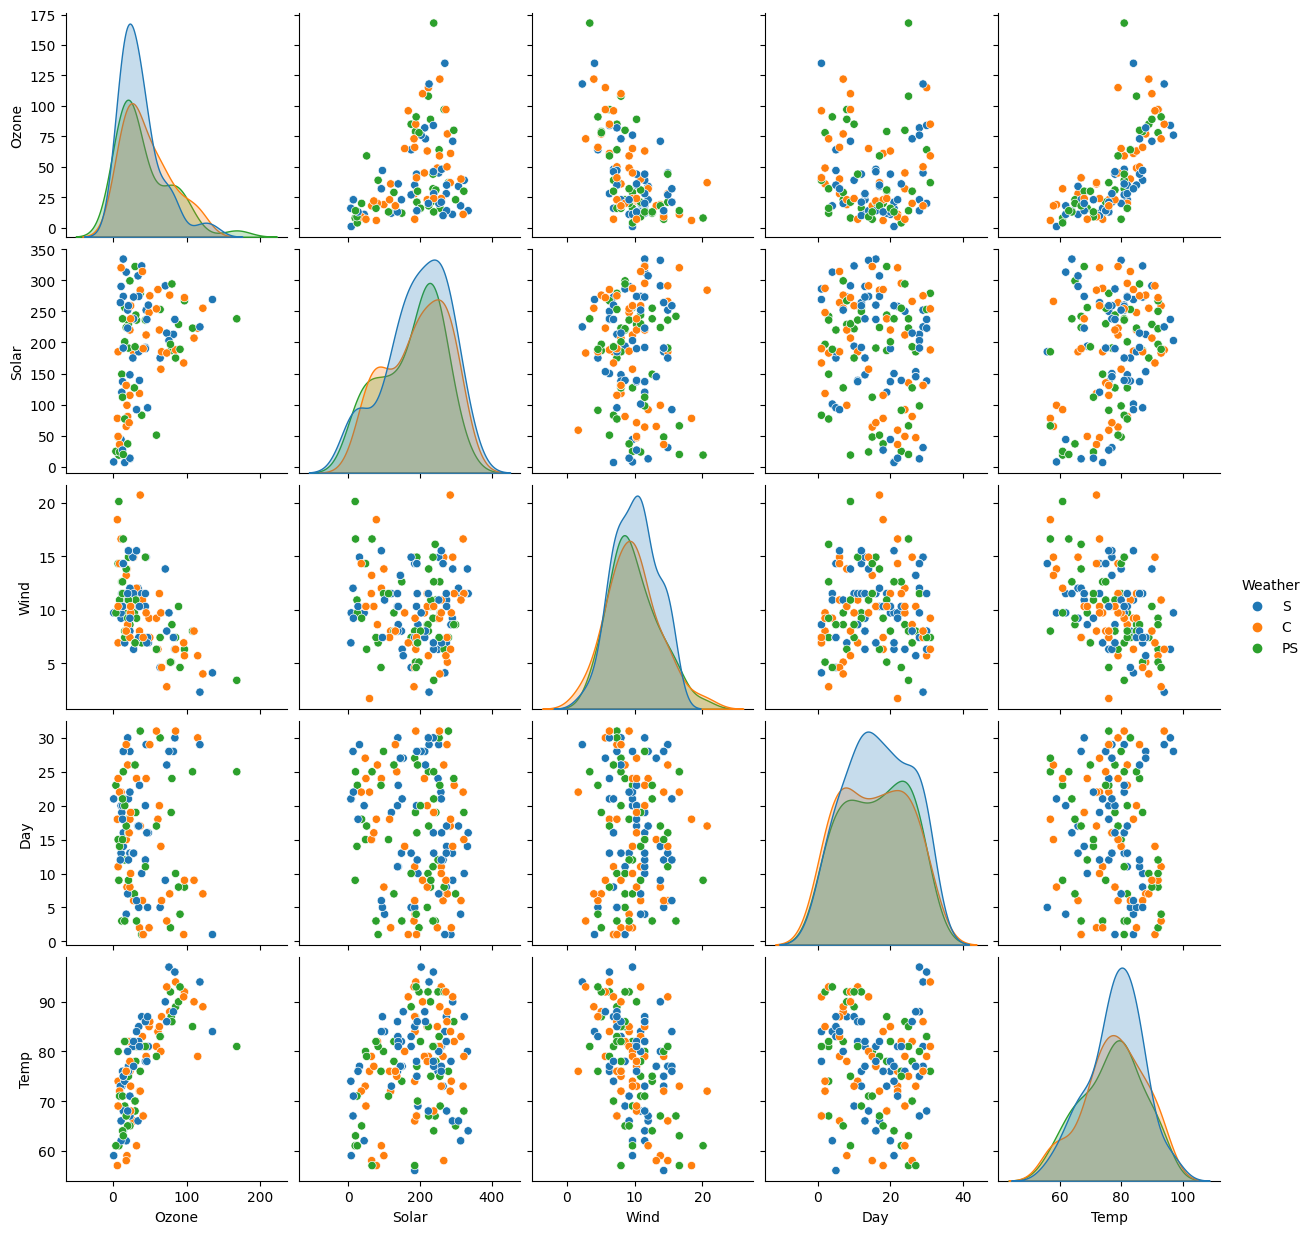

In [45]:
sns.pairplot(data=df1, hue="Weather")
plt.show()

In [46]:
df1.corr(numeric_only=True)

,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.344013,-0.593530,-0.035055,0.694098
Solar,0.344013,1.000000,-0.055036,-0.149447,0.260577
Wind,-0.593530,-0.055036,1.000000,0.040151,-0.441247
Day,-0.035055,-0.149447,0.040151,1.000000,-0.124538
Temp,0.694098,0.260577,-0.441247,-0.124538,1.000000


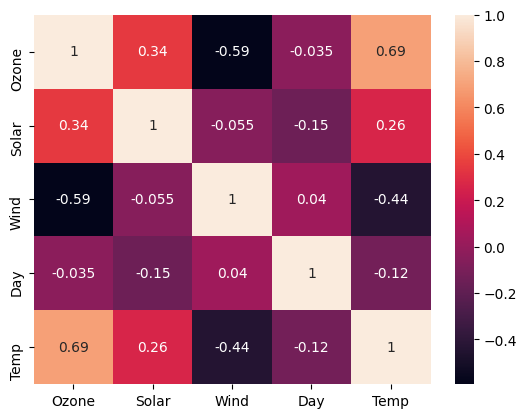

In [47]:
sns.heatmap(df1.corr(numeric_only=True), annot=True)
plt.show()

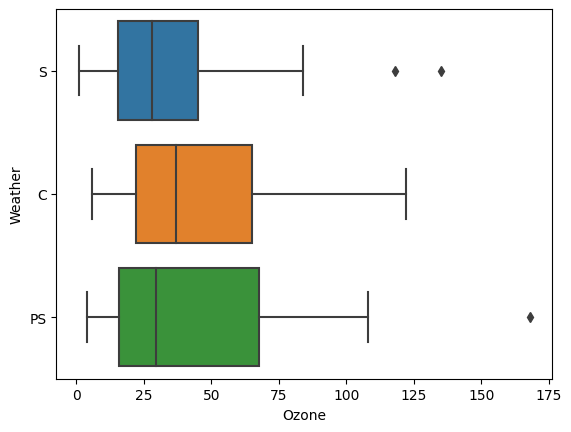

In [48]:
sns.boxplot(data = df, x = "Ozone", y = "Weather")
plt.show()

In [49]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,2025,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,2025,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,2025,75,S,2025-09-28


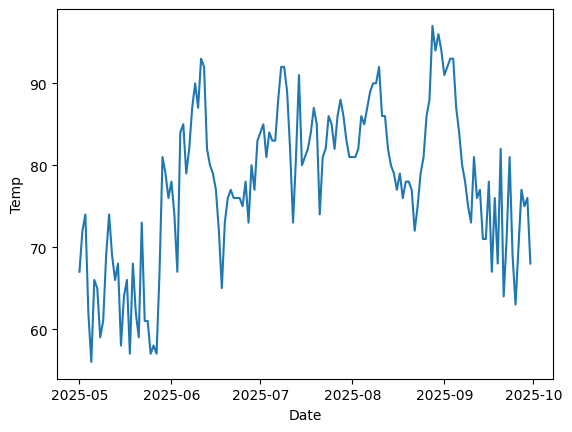

In [50]:
sns.lineplot(data=df, x="Date", y="Temp")
plt.show()

In [51]:
pd.crosstab(df["Month"], df["Weather"])

Weather,C,PS,S
Month,,,
5,11,9,12
6,9,9,12
7,11,8,11
8,10,8,11
9,8,13,13


In [52]:
df.groupby("Weather").mean(numeric_only=True)

,Ozone,Solar,Wind,Day,Year,Temp
Weather,,,,,,
C,46.162162,191.938776,9.783673,15.489796,2025.0,77.734694
PS,42.194444,174.574468,9.908511,16.042553,2025.0,76.872340
S,36.909091,193.050847,10.093220,16.661017,2025.0,78.067797


In [53]:
df.groupby("Weather")[["Ozone", "Wind"]].describe()

Ozone                                                       Wind  \
        count       mean        std  min   25%   50%    75%    max count   
Weather                                                                    
C        37.0  46.162162  32.593041  6.0  22.0  37.0  65.00  122.0  49.0   
PS       36.0  42.194444  37.225045  4.0  16.0  29.5  67.50  168.0  47.0   
S        44.0  36.909091  28.789386  1.0  15.5  28.0  45.25  135.0  59.0   

                                                           
              mean       std  min  25%   50%    75%   max  
Weather                                                    
C         9.783673  3.869450  1.7  7.4   9.7  11.50  20.7  
PS        9.908511  3.612348  3.4  7.4   9.2  12.05  20.1  
S        10.093220  3.177880  2.3  7.4  10.3  11.75  15.5

In [54]:
df[df["Ozone"]>41.0].sort_values(by="Temp", ascending=False)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
119,76.0,203.0,9.7,8,28,2025,97,S,2025-08-28
121,84.0,237.0,6.3,8,30,2025,96,S,2025-08-30
120,118.0,225.0,2.3,8,29,2025,94,S,2025-08-29
122,85.0,188.0,6.3,8,31,2025,94,C,2025-08-31
125,73.0,183.0,2.8,9,3,2025,93,C,2025-09-03
126,91.0,189.0,4.6,9,4,2025,93,PS,2025-09-04
124,78.0,197.0,5.1,9,2,2025,92,PS,2025-09-02
68,97.0,267.0,6.3,7,8,2025,92,PS,2025-07-08
69,97.0,272.0,5.7,7,9,2025,92,C,2025-07-09
123,96.0,167.0,6.9,9,1,2025,91,C,2025-09-01


In [55]:
# What are average values of numerical features for Sunny Weather?
df[df["Weather"] =='S'].mean(numeric_only=True)

Ozone      36.909091
Solar     193.050847
Wind       10.093220
Day        16.661017
Year     2025.000000
Temp       78.067797
dtype: float64

In [56]:
# What is the average temperature during the month of June when the weather is cloudy?
df[(df["Month"]=='6')&(df["Weather"]=="C")]["Temp"].mean().round()

78.0